# Análisis de los 25 retailers más grandes de Estados Unidos

---
## ------ ACLARACIÓN ------

Tal parece que la columna "Sales/Avg. Store" de la base de datos empleada muestra valores erróneos, falla en mostrar el promedio de venta por el número de ventas físicas. Por ello, en la base de datos se creará una nueva columna con los valores resultado de dividir las ventas por las tiendas de cada compañía, la columna se llama "Sales/Stores".

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mlp

In [2]:
'''Se lee la base de datos a emplear'''
df = pd.read_csv('largest_us_retailers.csv')
df.sort_values('Sales', ascending=False)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [3]:
'''Se filtra la fila del dataframe con mayor número de ventas'''
df_without_top = df[df['Sales'] != np.max(df['Sales'])]
df_without_top.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores


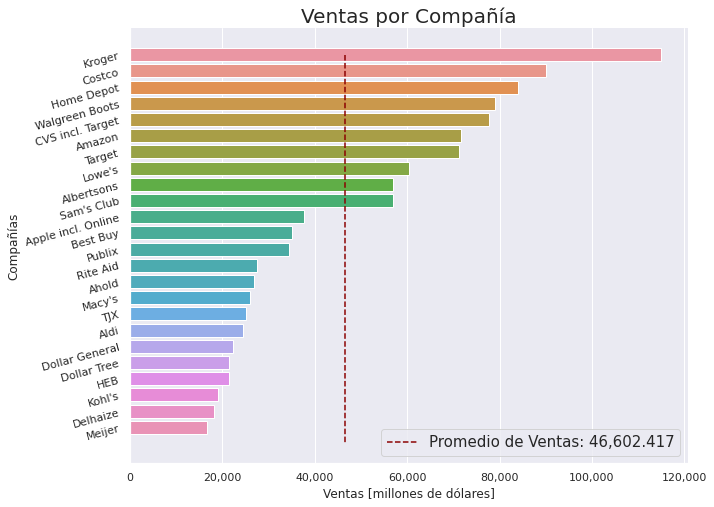

In [4]:
'''Se calcula la media de ventas'''
sales_mean_without_top = df_without_top['Sales'].mean()

'''Se grafican las ventas'''
colors = np.linspace(0.1,1,len(df_without_top))
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='Company', x='Sales', data=df_without_top)
ax.set_xlabel('Ventas [millones de dólares]')
ax.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Compañías')
ax.set_yticklabels(ax.get_yticklabels(), rotation=15)
ax.vlines(x=sales_mean_without_top, linestyle='dashed', ymin=0, ymax=len(df_without_top), 
            color='darkred', label='Promedio de Ventas: {:,.3f}'.format(sales_mean_without_top))
plt.title('Ventas por Compañía', fontsize=20)
plt.legend(loc='best', fontsize=15)
sns.despine(right=True)
plt.show()

#### Aspectos a destacar:
 * El **promedio de ventas sin la compañía dominante** es de 46,602.417 millones de dólares.
 * De dicho promedio, solo 10 empresas de las 24 lo sobrepasan.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

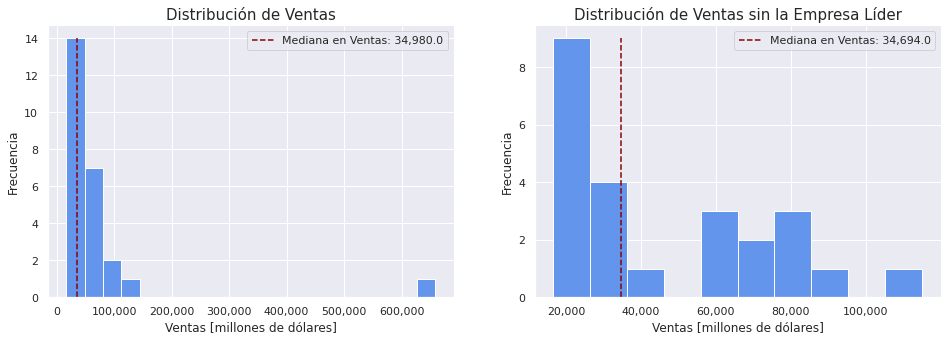

----- Empresas por encima de la mediana ----- 
    Contemplando a la empresa líder: 13 
    Sin contar a la empresa líder: 12


In [5]:
'''Se calcula la mediana de ventas'''
median_sales = df['Sales'].median() 
'''Se calcula la mediana de ventas sin la empresa líder en ventas'''
median_sales_without_top = df_without_top['Sales'].median() 

'''Se grafican los histogramas para cada caso'''
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.set_theme()

'''Caso1. Todas las empresas'''
counts, bins, _ = ax1.hist(df['Sales'], bins=20, color='cornflowerblue')
ax1.vlines(x=median_sales, linestyle='dashed', ymin=0, ymax=counts[0], color='darkred',
            label='Mediana en Ventas: {:,.1f}'.format(median_sales))
ax1.set_title('Distribución de Ventas', fontsize=15)
ax1.set_xlabel('Ventas [millones de dólares]')
ax1.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylabel('Frecuencia')
ax1.legend(loc='best')

'''Caso 2. Ignorando a la empresa líder'''
counts, bins, _ = ax2.hist(df_without_top['Sales'], bins=10, color='cornflowerblue')
ax2.vlines(x=median_sales_without_top, linestyle='dashed', ymin=0, ymax=counts[0], color='darkred',
            label='Mediana en Ventas: {:,.1f}'.format(median_sales_without_top))
ax2.set_title('Distribución de Ventas sin la Empresa Líder', fontsize=15)
ax2.set_xlabel('Ventas [millones de dólares]')
ax2.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_ylabel('Frecuencia')
ax2.legend(loc='best')

sns.despine(right=True)
plt.show()

print('----- Empresas por encima de la mediana -----',
        '\n    Contemplando a la empresa líder: {}'.format(len(df.loc[df['Sales'] >= median_sales])),
        '\n    Sin contar a la empresa líder: {}'.format(len(df_without_top.loc[df_without_top['Sales'] >= median_sales_without_top])))

#### Aspectos a destacar:
Ya que el valor ventas de la empresa líder está muy alejada de las demás empresas, se puede dividir el análisis en dos casos:
 - Descartándola se tienen 12 empresas están por encima o igual de la mediana de 34,980 millones.
 - Tomándola en cuenta se tienen 13 empresas por encima de la mediana igual a 34,694 millones.
En cualquiera de los dos casos, el número de empresas solo cambia en uno: la propia empresa líder. Por lo tanto,teniendo 25 empresas, se sabe que **la mayoría de empresas supera las ventas de 34,694 millones de dólares**.

* **Nota**. La compañía Best Buy tiene exactamente las ventas iguales a la mediana cuando se contempla a la empresa líder, en todo caso, la afirmación se podría cambiar a decir que **la mayoría de empresas tienen ventas mayores o iguales que 34,980 millones de dólares**.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

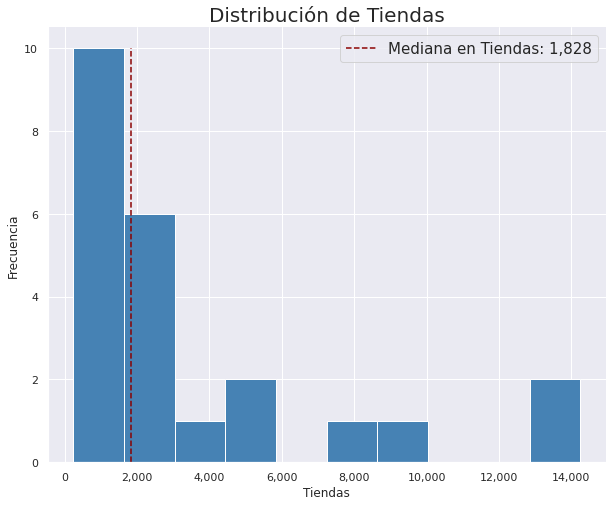

Empresas por encima de la mediana: 12


In [6]:
'''Se calcula la mediana de tiendas'''
median_stores = df['Stores'].median() 

'''Se grafican los histogramas para cada caso'''
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme()
counts, bins, _ = ax.hist(df['Stores'], bins=10, color='steelblue')
ax.vlines(x=median_stores, linestyle='dashed', ymin=0, ymax=counts[0], color='darkred',
            label='Mediana en Tiendas: {:,.0f}'.format(median_stores))
ax.set_title('Distribución de Tiendas', fontsize=20)
ax.set_xlabel('Tiendas')
ax.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Frecuencia')
ax.legend(loc='best', fontsize=15)
sns.despine(right=True)
plt.show()

print('Empresas por encima de la mediana: {}'.format(len(df.loc[df['Stores'] >= median_stores])))

#### Aspectos a destacar:
 * A comparación del caso de ventas, en el número de tiendas la mayoría de retailers no supera la mediana. **La mayoría de las compañías tienen menos de 1,828 tiendas**.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

#### Búsqueda de Contradicción
Se va a comparar la razón de ventas por tiendas de la empresa líder en ventas con el valor más alto dento de la base de datos.
 * Si coinciden, significa que la empresa líder en ventas también lo es en número de tiendas.
 * Si no coinciden, se tiene el contraejemplo perfecto a la hipótesis de que a mayor número de tiendas se tiene mayor dinero en ventas. 

In [7]:
'''Creamos una nueva columna "Sales/Stores"'''
df['Sales/Stores'] = df['Sales'] / df['Stores']
df.head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034


In [8]:
'''Se muestran los datos de la empresa líder en ventas'''
df.loc[df['Sales'] == np.max(df['Sales'])][['Company','Sales', 'Stores', 'Sales/Stores']]

,Company,Sales,Stores,Sales/Stores
0,Walmart US,658119,4574.0,143.882597


In [9]:
'''
Se realiza una comparación si coincide la razón de ventas por tienda de la compañía líder en ventas 
y el máximo valor que se tiene regitro en la base de datos
'''
df.loc[0,'Sales/Stores'] == np.max(df['Sales/Stores'])

False

Esto ya es suficiente para abandonar la idea que la hipótesis se cumple siempre, es decir, se aclara que **tener más tiendas no implica necesariamente obtener más dinero en ventas**.

In [10]:
'''Se prosigue a buscar la empresa con la razón ventas/tiendas más alta'''
df.loc[df['Sales/Stores'] == np.max(df['Sales/Stores'])][['Company','Sales', 'Stores', 'Sales/Stores']]

,Company,Sales,Stores,Sales/Stores
2,Costco,90048,495.0,181.915152


In [11]:
'''Se selecciona del dataframe el nombre de las compañías a partir de su índice'''
top_sales_company = df.loc[0, 'Company']
top_sps_company = df.loc[2, 'Company']

'''Se localizan ambas razones de las compañías a partir de sus índices en la base de datos'''
walmart_sps = df.loc[0,'Sales/Stores']
costco_sps = df.loc[2,'Sales/Stores']
factor = costco_sps/walmart_sps

print('{} supera {:.2f} veces a {} en razón ventas por tienda'.format(top_sps_company, factor, top_sales_company))

Costco supera 1.26 veces a Walmart US en razón ventas por tienda


#### Aspectos a destacar:
* **El mayor número de ventas promedio por tienda física no es para *Walmart US*, sino *Costco*** con 181.915 millones de dólares.
 * Con una diferencia considerable, la empresa ***Costco*** es la que recibe más ventas por cada tienda, siendo la tercera en mayor dinero por ventas y ganándole a ***Walmart US*** por un 26%. Esto dice nuevamente que **tener más tiendas no necesariamente implica obtener más dinero en ventas**.

#### Análisis de correlación

Por otra parte, el contraejemplo dado puede no ser suficiente para negar en su totalidad la hipótesis dada, se probará ahora con la correlación de las columnas de ventas y tiendas, empezando por una gráfica de dispersión y después con una matriz de correlación vista desde un mapa de calor.

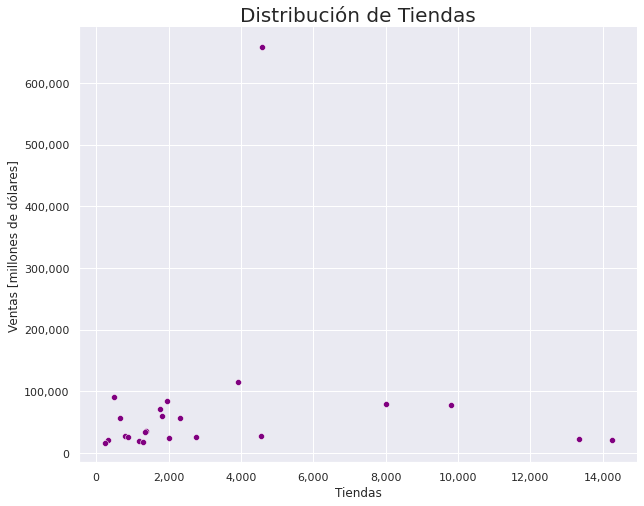

In [12]:
'''Gráfica de dispersión'''
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme()
ax = sns.scatterplot(x='Stores', y='Sales', data=df, color='purple')
ax.set_title('Distribución de Tiendas', fontsize=20)
ax.set_xlabel('Tiendas')
ax.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Ventas [millones de dólares]')
ax.yaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine(right=True)
plt.show()

Se puede observar dónde se encuentra el punto que representa Walmart, pero a simple vista no se encuentra un patrón de correlación. A continuación se prueba la matriz de correlación con la definición de correlación de Pearson (de carácter lineal).

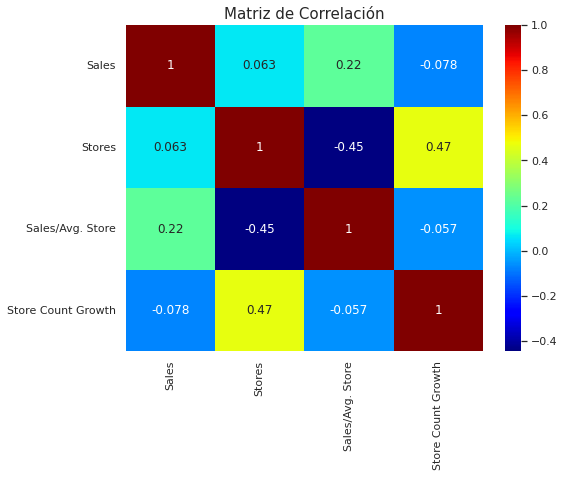

In [13]:
'''Se forma la matriz de correlación con las columnas del dataframe, exceptuando "Sales/Stores"'''
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns='Sales/Stores').corr(), cmap='jet', annot=True)
plt.title('Matriz de Correlación', fontsize=15)
plt.show()

#### Aspectos a destacar:
 * Viendose tanto el mapa de calor como la gráfica de dispersión, se muestra que las ventas y la cantidad de tiendas no están correlacionadas; dando en el mapa de calor un valor de 0.063, sabiendo previamente que en la definición de correlación de Pearson 0 significa que las variables están no correlacionadas entre sí.
Con esto último, **ya se puede descartar la idea que a mayor cantidad de tiendas se tendrá más dinero en las ventas**.

**Nota**. Algo interesante a ver es que el número de tiendas está parcialmente correlaciónado con el factor de creciemiento de tiendas por compañia, marcando un coeficiente de 0.47.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [14]:
'''Se calcula el rango de las ventas del sector de retailers'''
sales_range = df['Sales'].max()-df['Sales'].min()

print('El rango entre ventas es de {:,} millones de dólares'.format(sales_range))
print('El rango es {:.2f} más grande que la mediana'.format(sales_range/median_sales))
print('La suma de ventas totales de las 12 empresas debajo de la mediana es {:,} millones de dólares'.format(df.loc[df['Stores'] <= median_stores]['Sales'].sum()))

El rango entre ventas es de 641,527 millones de dólares
El rango es 18.34 más grande que la mediana
La suma de ventas totales de las 12 empresas debajo de la mediana es 475,951 millones de dólares


#### Aspectos a destacar:
 * El rango de ventas es de 641,527 millones de dólares
 * Recordando que la mediana en ventas es de 34,980, entonces se tiene que el rango de ventas es 18.34 veces más grande que la mediana de las empresas.
 * El rango es mayor que la suma acumulada del dinero por ventas de las 12 empresas con menores ventas que la mediana; esto esboza la naturaleza de ponderación que hay en el sector de *retailers* en los Estados Unidos.

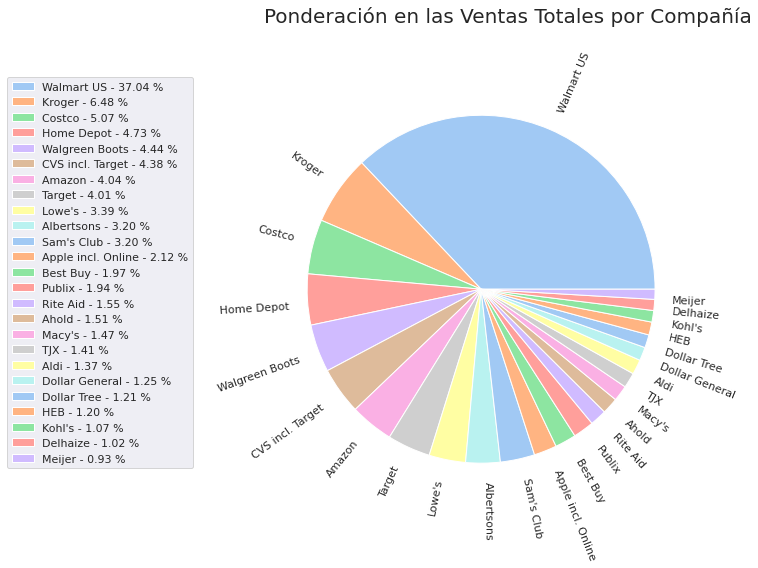

In [15]:
'''Se grafican las ponderaciones del sector de retailers'''
weights = 100.*df['Sales']/df['Sales'].sum()

plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel')
#plt.pie(df['Sales'], labels=df['Company'], autopct='%.2f%%', colors= colors, )
patches, _ = plt.pie(df['Sales'], labels=df['Company'], colors= colors, rotatelabels =True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df['Company'], weights)]
plt.title('Ponderación en las Ventas Totales por Compañía', loc='left', y=1.1, fontsize=20)
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.15, 1))
plt.show()

#### Aspectos a destacar:
 * **Las primeras 4 empresas de retailers controlaron más del 50% de las ventas totales**, alrededor del 53.32%.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

Se empezará por visualizar en el dataframe cada una de las top 5 empresas.

In [16]:
'''Top 5 empresas con más tiendas físicas'''
df_top5_stores = df.sort_values('Stores', ascending=False).head(5)
df_top5_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,1.506246
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597


In [17]:
'''Top 5 empresas con más dinero por ventas'''
df_top5_sales = df.sort_values('Sales', ascending=False).head(5)
df_top5_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034


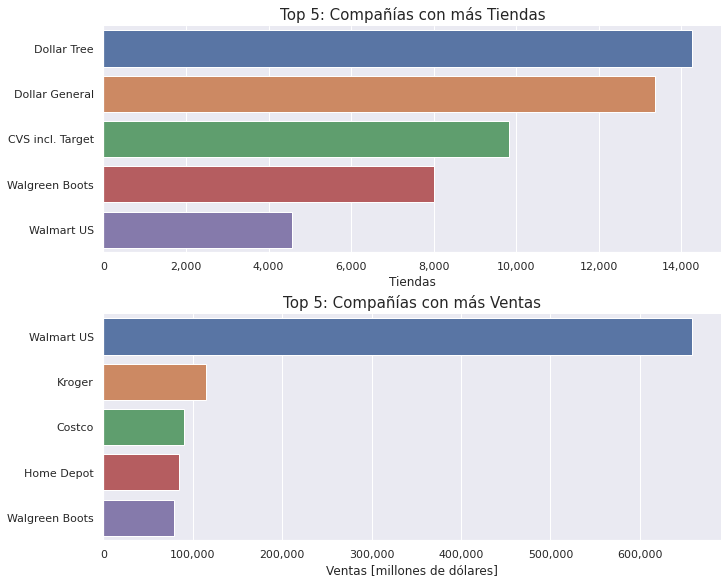

In [18]:
'''Se grafican los histogramas para cada caso'''
fig, axs= plt.subplots(2,figsize=(10,8), constrained_layout=True)
sns.set_theme()

'''Top 5 compañías con más tiendas'''
sns.barplot(y='Company', x='Stores', data=df_top5_stores, ax=axs[0])
axs[0].set_ylabel(None)
axs[0].set_title('Top 5: Compañías con más Tiendas', fontsize=15)
axs[0].set_xlabel('Tiendas')
axs[0].xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))

'''Top 5 compañías con más ventas'''
sns.barplot(y='Company', x='Sales', data=df_top5_sales, ax=axs[1])
axs[1].set_ylabel(None)
axs[1].set_title('Top 5: Compañías con más Ventas', fontsize=15)
axs[1].set_xlabel('Ventas [millones de dólares]')
axs[1].xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))

sns.despine(right=True)
plt.show()

In [19]:
'''Se hace un merge para ver las coincidencias entre los datos, en particular, las compañías dentro de ambos grupos'''
pd.merge(left=df_top5_sales, right=df_top5_stores)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034


#### Aspectos a destactar:
  * Las empresas que se encuentran en ambos gráficos son ***Walgreen Boots*** y ***Walmart US***.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [20]:
'''Se visualizan las ventas a partir de las categorías dadas en el dataframe'''
df_categorized = df.groupby('Category')[['Sales']].sum().sort_values('Sales', ascending=False)
df_categorized

,Sales
Category,
Supercenters,745919
Grocery,297164
Drug Stores,184202
Home Improvement,144287
Warehouse Club,90048
Electronic/Mail Order,71687
Warehouse Clubs,56828
Department Stores,45088
Dollar Stores,43698


**Nota**. La empresa ***Apple*** no aparece en el dataframe pues su categoría es *NaN*, pero por propósitos del análisis se puede descartar.

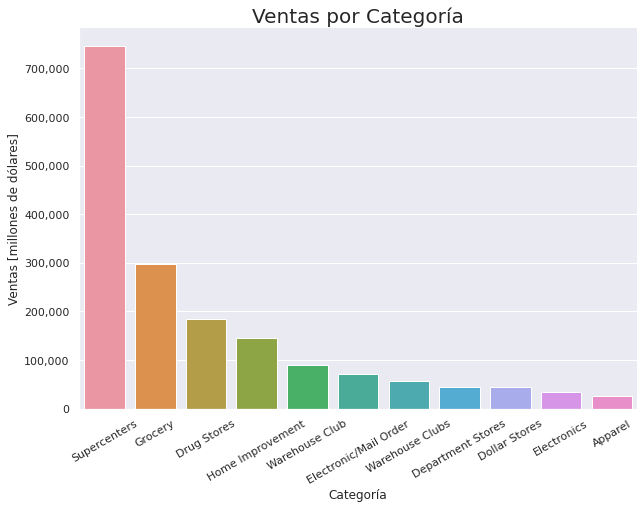

Supercenters supera a Grocery por 2.51x


In [21]:
'''Se grafican las ventas por categoria'''
colors = np.linspace(0.1,1,len(df_categorized))
fig, ax = plt.subplots(figsize=(10,7))
sns.set_theme()
ax = sns.barplot(x=df_categorized.index, y='Sales', data=df_categorized)
ax.set_ylabel('Ventas [millones de dólares]')
ax.yaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Categoría')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Ventas por Categoría', fontsize=20)
sns.despine(right=True)
plt.show()

first_category_sales = df_categorized.loc[df_categorized.index[0], 'Sales']
second_category_sales = df_categorized.loc[df_categorized.index[1], 'Sales']
print('{} supera a {} por {:.2f}x'.format(df_categorized.index[0], df_categorized.index[1],
                                            first_category_sales / second_category_sales,))

#### Aspectos a destacar:
 * **La categoría con más dinero por ventas es *supercenters***, superando al segundo lugar por 2.51 veces.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

Resuelta en la pregunta 4, pero se hará más énfasis con visualización al respecto.

In [22]:
'''Se busca la empresa con la razón ventas/tiendas más alta'''
df.loc[df['Sales/Stores'] == np.max(df['Sales/Stores'])][['Company','Sales', 'Stores', 'Sales/Stores']]

,Company,Sales,Stores,Sales/Stores
2,Costco,90048,495.0,181.915152


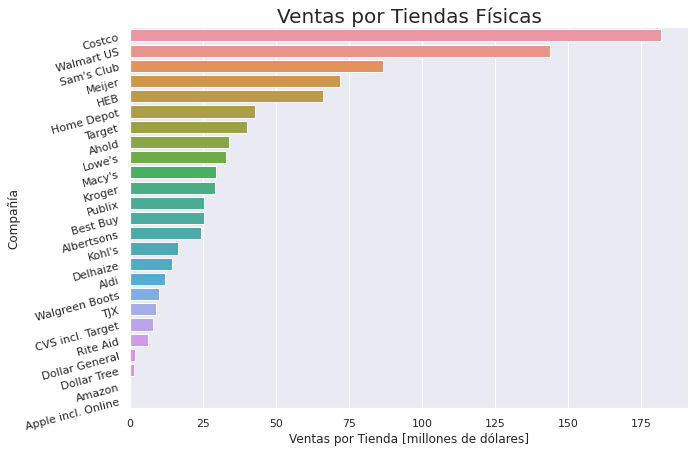

In [23]:
'''Se grafican las ventas promedio por tienda de cada compañía'''
colors = np.linspace(0.1,1,len(df))
fig, ax = plt.subplots(figsize=(10,7))
sns.set_theme()
ax = sns.barplot(y='Company', x='Sales/Stores', data=df.sort_values('Sales/Stores', ascending=False))
ax.set_xlabel('Ventas por Tienda [millones de dólares]')
ax.set_ylabel('Compañía')
ax.set_yticklabels(ax.get_yticklabels(), rotation=15)
plt.title('Ventas por Tiendas Físicas', fontsize=20)
sns.despine(right=True)
plt.show()

#### Aspectos a destacar:
 * Volviendo a la respuesta de la pregunta 4, **Costco es la empresa con mayor número de ventas con respecto a la cantidad de tiendas físicas**.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Para encontrar a las compañías sin tiendas físicas solo basta encontrar en la columna de "Stores " las filas con valores nulos o *NaN*.

In [24]:
'''Se identifican a las empresas con valores nulos en la columna de tiendas físicas'''
df[df['Stores'].isnull()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN


In [25]:
'''
Se prosigue a crear una nueva columna categórica donde se especifica si las ventas de la compañíason en
establecimientos físicos o en línea
'''
df['Sales Type'] = ['Online'if company==True else 'Physical' for company in df['Stores'].isnull()]
df.head(7)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Sales Type
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597,Physical
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055,Physical
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152,Physical
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878,Physical
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034,Physical
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443,Physical
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN,Online


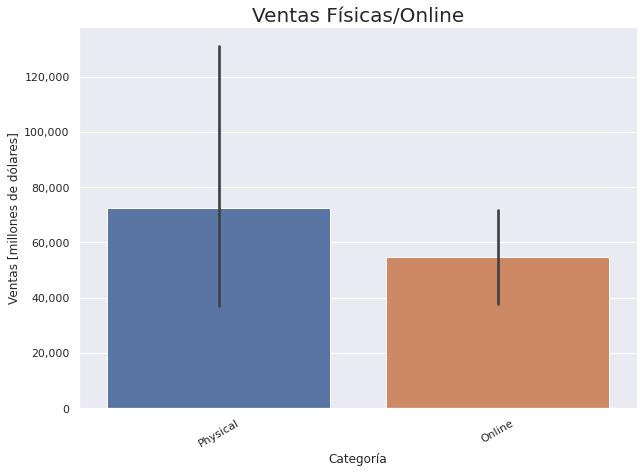

In [26]:
'''Se grafican las ventas promedio de las tiendas online y físicas con sus respectivas barras de eror'''
colors = np.linspace(0.1,1,len(df['Sales Type'].unique()))
fig, ax = plt.subplots(figsize=(10,7))
sns.set_theme()
ax = sns.barplot(x='Sales Type', y='Sales', data=df)
ax.set_ylabel('Ventas [millones de dólares]')
ax.yaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Categoría')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Ventas Físicas/Online', fontsize=20)
sns.despine(right=True)
plt.show()

In [27]:
'''Se visualizan la suma acumulada, el promedio, el mínimo y el máximo de ventas para cada modalidad de venta'''
df_sales_type = df.groupby('Sales Type')[['Sales']].agg([sum, 'mean', 'min', 'max'])
df_sales_type

Sales                             
                sum          mean    min     max
Sales Type                                      
Online       109351  54675.500000  37664   71687
Physical    1667226  72488.086957  16592  658119

#### Aspectos a destacar:
 * En promedio, **las empresas online no se encuentran tan por debajo de los valores de venta de las empresas con tiendas físicas**. Mas aún, al no tener que pagar rentas por establecimientos físicos las ganancias netas podrían ser porcentualmente mayores que las de sus competidoras, sin embargo, con la limitada información con la que se cuenta no es posible indagar más en esta hpótesis.
 * Los mínimos en ventas de cada modalidad de venta son muy distantes, la empresa con ventas online con menores ventas supera por más del doble a la de menores ventas en físico. Esto podía ser un indicativo de que **no tener tiendas físicas no es motivo de tener bajas ventas**. El incursionar en las ventas online en el sector de retailers puede ser una buena idea bajo la poca competencia que hay, aunque eso signifique invertir en la infraestructura, hace falta más información sobre los siguientes años para ver la evolución de esta clase de ventas.

## III. Tus propias preguntas

### 10. ¿Cuáles son las tiendas con el crecimiento más alto y serán las mismas con las 5 con mayor número de tiendas?

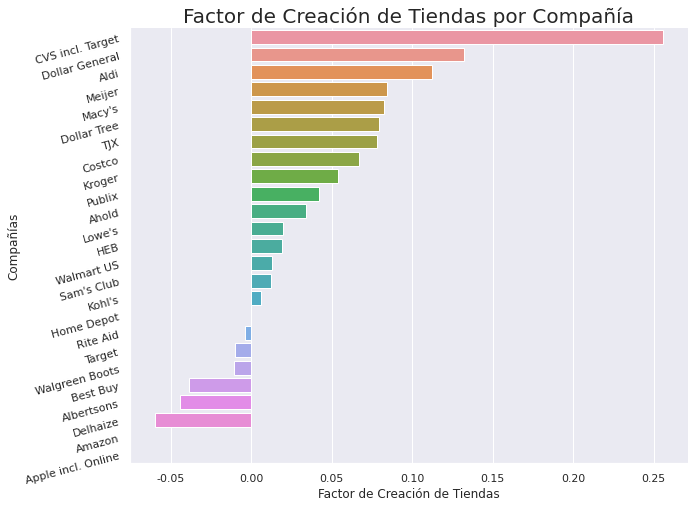

In [44]:
'''Se grafica el factor de creación de nuevas tiendas por compañía'''
colors = np.linspace(0.1,1,len(df))
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='Company', x='Store Count Growth', data=df.sort_values('Store Count Growth', ascending=False))
ax.set_xlabel('Factor de Creación de Tiendas')
ax.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('Compañías')
ax.set_yticklabels(ax.get_yticklabels(), rotation=15)
plt.title('Factor de Creación de Tiendas por Compañía', fontsize=20)
sns.despine(right=True)
plt.show()

In [49]:
'''Se crea un nuevo dataframe con el top 5 en crecimiento de tiendas'''
df_top5_store_growth = df.sort_values('Store Count Growth', ascending=False).head(5)
df_top5_store_growth

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Sales Type
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443,Physical
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468,Physical
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,12.074221,Physical
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840,Physical
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,29.277840,Physical


In [51]:
df_top5_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,1.506246
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597


In [50]:
pd.merge(left=df_top5_stores, right=df_top5_store_growth)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Sales Type
0,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468,Physical
1,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443,Physical


#### Aspectos a destacar:
 * **La compañía con mayor crecimiento de tiendas es *Target***, sin duda se encuentra en una etapa expansionista, incluso cuando **también está en el 3er lugar en mayor número de tiendas**.
 * Las empresas que están en ambos tops son ***Dollar General*** y ***Target***.

### 11. ¿Cuál es la ponderación que tiene la empresa líder en su respectiva categoría? 

Es bien conocido que la empresa más grande es *Walmart US*.

In [29]:
'''Se filtrarán todas las empresas que coincidan con su misma categoría.'''
df_supercenters = df[df['Category'] == df.loc[0,'Category']]
df_supercenters

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Sales Type
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597,Physical
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102,Physical
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,71.826840,Physical


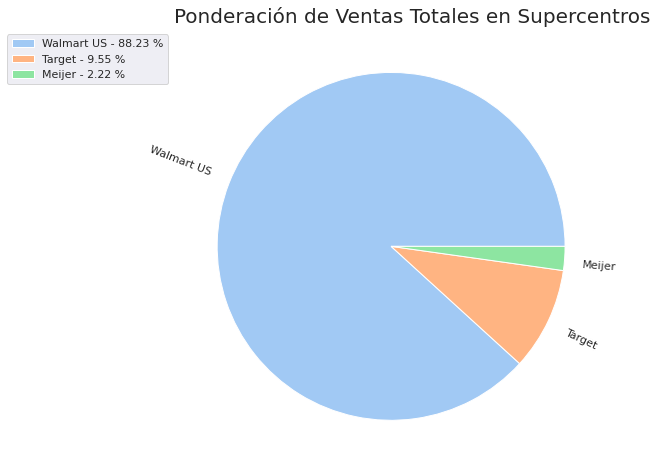

In [30]:
'''Se grafican las ponderaciones de la categoría "supercenters" '''
weights = 100.*df_supercenters['Sales']/df_supercenters['Sales'].sum()

plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel')
patches, _ = plt.pie(df_supercenters['Sales'], labels=df_supercenters['Company'], colors= colors, rotatelabels =True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_supercenters['Company'], weights)]
plt.title('Ponderación de Ventas Totales en Supercentros', loc='left', fontsize=20)
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0, 1))
plt.show()

In [31]:
print('La empresa {} supera al promedio de ventas de sus competidores por {:.2f} veces'.format(df.loc[0,'Company'],
                                                                                                df.loc[0,'Sales']/df_without_top['Sales'].mean()))

La empresa Walmart US supera al promedio de ventas de sus competidores por 14.12 veces


#### Aspectos a destacar:
Recapitulando:
 * La **compañía con mayor número de ventas** es ***Walmart US*** con 658,119 millones de dólares.
 * *Walmart US* **vendió 14.12 veces más que el promedio de sus competidores**, aproximadamente.
 * Asimismo, ***Walmart US* controla el 88.23% de dinero en ventas en supercentros**; esto último puede sugerir que existe un potencial riesgo de monopolio por parte de la empresa, pues controla más del 51% de la capturación de ventas del mercado de *supercenters*.

### 12. ¿Cuál es la categoría de *retail* más competitiva?

In [32]:
'''Se visualizan el conteo de compañías, la suma acumulada, el mínimo y máximo de ventas por categoría'''
df.groupby('Category')['Sales'].agg(['count','sum',min,max]).sort_values('sum', ascending=False)

,count,sum,min,max
Category,,,,
Supercenters,3,745919,16592,658119
Grocery,7,297164,18201,115037
Drug Stores,3,184202,27486,78924
Home Improvement,2,144287,60311,83976
Warehouse Club,1,90048,90048,90048
Electronic/Mail Order,1,71687,71687,71687
Warehouse Clubs,1,56828,56828,56828
Department Stores,2,45088,19060,26028
Dollar Stores,2,43698,21464,22234


La categoría *grocery* parece ser la más diversificada. Se hará enfoque particular en esa categoría.

In [33]:
'''Se filtran en un nuevo dataframe las compañías de la categoría "grocery"'''
df_groceries = df[df['Category'] == 'Grocery']
df_groceries

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Stores,Sales Type
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055,Physical
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072,Physical
13,Publix,34408,1351.0,25.997733,0.042438,Grocery,25.468542,Physical
15,Ahold,26903,794.0,34.446863,0.033854,Grocery,33.882872,Physical
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,12.074221,Physical
21,HEB,21384,323.0,66.825000,0.018927,Grocery,66.204334,Physical
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery,14.219531,Physical


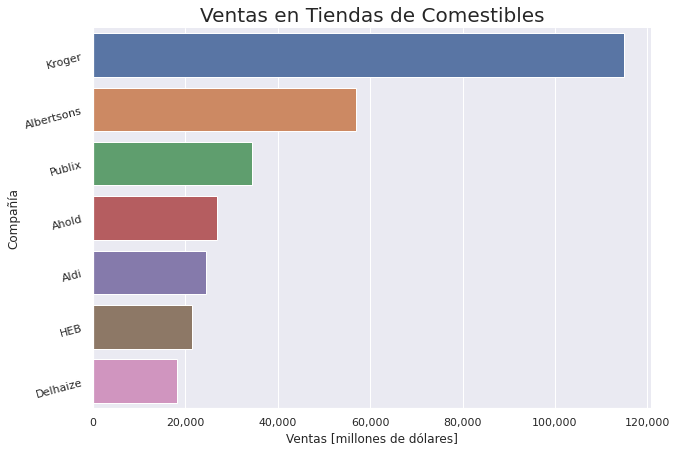

In [34]:
'''Se grafican las ventas de la categoría "grocery"'''
colors = np.linspace(0.1,1,len(df_groceries))
fig, ax = plt.subplots(figsize=(10,7))
sns.set_theme()
ax = sns.barplot(y='Company', x='Sales', data=df_groceries.sort_values('Sales', ascending=False))
ax.set_xlabel('Ventas [millones de dólares]')
ax.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Compañía')
ax.set_yticklabels(ax.get_yticklabels(), rotation=15)
plt.title('Ventas en Tiendas de Comestibles', fontsize=20)
sns.despine(right=True)
plt.show()

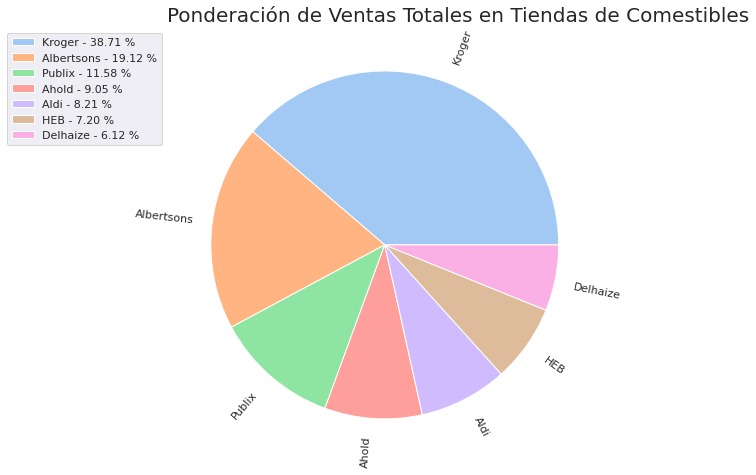

In [35]:
'''Se grafican las ponderaciones de la categoría "supercenters" '''
weights = 100.*df_groceries['Sales']/df_groceries['Sales'].sum()

plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel')
patches, _ = plt.pie(df_groceries['Sales'], labels=df_groceries['Company'], colors= colors, rotatelabels =True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_groceries['Company'], weights)]
plt.title('Ponderación de Ventas Totales en Tiendas de Comestibles', loc='left', fontsize=20)
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0, 1))
plt.show()

#### Aspectos a destacar:
 * A diferencia de los supercentros, **las tiendas de comestibles parecen tener una competencia más sana**, ninguna de las 7 empresas tiene un peso realmente significativo respecto al control de ventas de su grupo.
 * Siendo la segunda categoría con el mayor número de ventas igual a 297,164 millones de dólares, la empresa que más aporta del grupo es ***Kroger*** con 115,037 millones de dólares, que representa un 38.71% del total.

---
### Notas Finales
Algo que queda del todo claro al autor de este cuaderno sobre la base de datos empleada es cómo se extrajeron los datos de la columna "Sales/Avg. Store", ya que si son el promedio de venta por tienda física eso es como dividir para cada empresa el número de ventas entre el número de tiendas. Al hacer eso obtuve una serie de valores que no concuerdan con lo que muestra la columna "Sales/Avg. Store". 


In [36]:
df[['Company','Sales','Stores','Sales/Stores', 'Sales/Avg. Store']]

,Company,Sales,Stores,Sales/Stores,Sales/Avg. Store
0,Walmart US,658119,4574.0,143.882597,65.649725
1,Kroger,115037,3931.0,29.264055,30.031850
2,Costco,90048,495.0,181.915152,187.795620
3,Home Depot,83976,1965.0,42.735878,42.735878
4,Walgreen Boots,78924,8002.0,9.863034,9.810927
5,CVS incl. Target,77792,9813.0,7.927443,8.825959
6,Amazon,71687,NaN,NaN,NaN
7,Target,71208,1772.0,40.185102,39.982033
8,Lowe's,60311,1828.0,32.992888,33.311792
9,Albertsons,56829,2326.0,24.432072,23.877731


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9f639c16-f38a-4f48-ad99-a5a29cc0f2b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>